## Gradient Descent

In [95]:
from numpy import * 
import matplotlib.pyplot as plt 

In [96]:
#Loading data from the file
points = genfromtxt("input/data.csv", delimiter=",")
print (points[0:10,:])
print('Shape: {0} '.format(points.shape))

[[ 32.50234527  31.70700585]
 [ 53.42680403  68.77759598]
 [ 61.53035803  62.5623823 ]
 [ 47.47563963  71.54663223]
 [ 59.81320787  87.23092513]
 [ 55.14218841  78.21151827]
 [ 52.21179669  79.64197305]
 [ 39.29956669  59.17148932]
 [ 48.10504169  75.3312423 ]
 [ 52.55001444  71.30087989]]
Shape: (100, 2) 


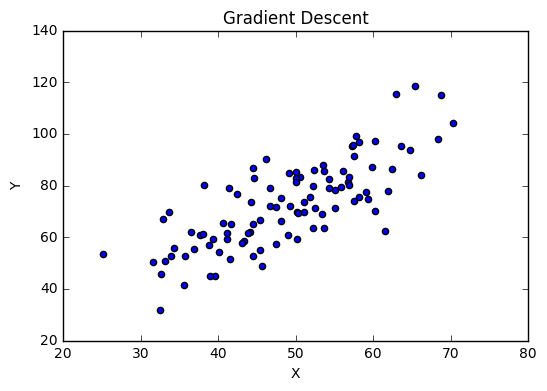

In [97]:
# Plot the load data points here 


plt.scatter(points[:,0], points[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gradient Descent')
plt.show()

In [98]:
#Initializing the hyperparameters with initial value

b = 0
m = 0 
learning_rate = 0.0001 #alpha
num_iterations = 1000 #number of iteration

In [99]:
def GetGradientDescent(b_current, m_current, points,learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
        
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
   
    return [new_b, new_m]

In [100]:
def ComputerError(b,m,points):
    totalError = 0
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))
    

In [101]:
def RunAlgorithm(starting_b, starting_m, learning_rate, num_iterations, points):
    b = starting_b
    m = starting_m

    
    
    for i in range(num_iterations):
        b, m = GetGradientDescent(b, m, array(points), learning_rate)
        error = ComputerError(b, m, points)
        if error < float64(2.0):
            print(error)
            return [b, m]
              
        if i % 100 == 0: 
            print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(i, b, m, ComputerError(b, m, points)))
        
    return [b, m]

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649
After 100 iterations b = 0.035135020029129285, m = 1.4788015372774521, error = 112.64702056974568
After 200 iterations b = 0.04113767542736797, m = 1.478683556914539, error = 112.64341600405817
After 300 iterations b = 0.047135801867801, m = 1.4785656655669115, error = 112.63981687555349
After 400 iterations b = 0.05312940276749252, m = 1.4784478631674083, error = 112.63622317603011
After 500 iterations b = 0.05911848154092854, m = 1.478330149648919, error = 112.63263489729884
After 600 iterations b = 0.06510304160001891, m = 1.4782125249443832, error = 112.62905203118288
After 700 iterations b = 0.07108308635409925, m = 1.4780949889867918, error = 112.62547456951779
After 800 iterations b = 0.0770586192099327, m = 1.4779775417091856, error = 112.62190250415141
After 900 iterations b = 0.08302964357171226, m = 1.4

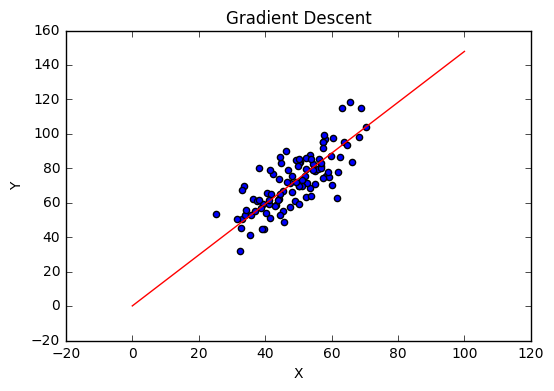

After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


In [102]:
print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(b, m, ComputerError(b, m, points)))
print ("Running...")
[b_new, m_new] = RunAlgorithm( b, m, learning_rate, num_iterations, points)
# Plot the load data points here 
x1 = 0
x2 = 100
plt.scatter(points[:,0], points[:,1])
plt.plot([x1, x2], [m_new * x1 + b_new,m_new * x2 + b_new],  'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gradient Descent')

plt.show()


print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b_new, m_new, ComputerError(b_new, m_new, points)))